# Chapter 4: Functional Programming with Statistics and Distributions

Often we are performing statistical operations over a large dataset. It can be difficult to understand the meaning conveyed by these measures. Learning to program presents an opportunity to better understand how functions work. In this chapter we will create some basic statistical functions and compare their output to the functions built into python. By creating the function, you will understand the meaning of summation signs. Computing these statistics by hand would be a laborious process and expensive in terms of time. Once a function is constructed, it can be employed to calculate statistics in a fraction of the time.

## Building a Function

| New Concepts | Description |
| --- | --- |
| _return obj_ from function | Functions may return an object to be saved if a variable is defined by the function i.e., var1 = function(obj1, obj2, . . .)|

So far, we have built programs on the fly. For purposes of pedagogy, this is fine. As you develop your skills, you want to form good practices. This includes the building of functions for repeated use as well as the building of classes. This chapter we will concentrate on functions. Build all of your functions in the same file, _statsFunctions.py_.

In python, functions take the form:

In [ ]:
def function_name(object1, object2, . . ., objectn):
    <operations>

If the function allows, you will pass an object by calling it in the parentheses that follow the function name. The first function that we build will be the total() function. We define the function algebraically as the sum of all values in a list of length j:

$\sum_{i=0}^{n-1} x_{i}$

Since lists indices start with the integer 0, we will write our functions as starting with _i = 0_ and process elements to the index of value _n - 1_. Since the range function in Python automatically counts to one less than the value identified, the for-loop used will take the form:

In [237]:
n=0
i=0
for values in range(i+1):
    i += 1

We will use it to return the sum of values in a list. After building this, we will pass a list to the function:

In [238]:
#statsFunctions.py
import random

def total(lst):
    total_ = 0
    n = len(lst)
    for i in range(n):
        total_ += lst[i]
    return total_

X1 = [3, 6, 9, 12, 15]
X2 = [random.randint(0,100) for i in range(100)]
print("X1:", X1)
print("X2:", X2)


X1: [3, 6, 9, 12, 15]
X2: [57, 82, 95, 75, 28, 25, 2, 73, 98, 86, 73, 84, 46, 55, 82, 95, 1, 96, 24, 25, 26, 69, 24, 37, 14, 56, 27, 44, 12, 25, 56, 68, 23, 39, 11, 4, 60, 22, 2, 83, 23, 59, 51, 17, 46, 25, 42, 26, 22, 65, 90, 7, 30, 76, 96, 0, 96, 83, 19, 100, 98, 73, 17, 28, 83, 38, 82, 69, 45, 84, 19, 63, 78, 87, 12, 96, 23, 42, 41, 90, 24, 2, 14, 8, 10, 3, 81, 48, 51, 89, 65, 9, 92, 68, 41, 2, 37, 73, 60, 89]


In [239]:
total1 = total(X1)
total2 = total(X2)
print("total of list1:", total1)
print("total of list2:", total2)

total of list1: 45
total of list2: 4911


The total() function is a simple function that will be used in many of the other functions that we write. You can find this and other functions from this chapter in [statsFunctions.py](https://github.com/jlcatonjr/Learn-Python-for-Stats-and-Econ/tree/master/Chapter%203).

## Statistical Functions
| New Concepts | Description |
| --- | --- |
| Operators e.g., !=, %, +=, \*\* | The operator != tests whether the values on either side of the operator are equal; _a % b_ returns the remainder of $a / b$; _a += b_ sets a equal to $a + b$; _a ** b_ raises a to the b power ($a^b$). |
| Dictionary | A dictionary is a datastructure that uses keys instead of index values. Each unique key references an object linked to that key. |
| Dictionary Methods e.g., _dct.values()_ | dct.values() returns a list of the objects that are referenced by the dictionaries keys.|
| Default Function Values | Function may assume a default value for values passed to it. e.g., _def function(val1 = 0, val2 = 2, …)_ | 

### Average Statistics

#### Mean


Let $X_1, X_2,...,X_n$ represent $n$ random variables. For a given dataset, useful descriptive statistics of central tendency include mean, median, and mode, which we built as functions in a previous chapter. 

We define the mean of a set of numbers:
$\bar{X} = \frac{\sum_{i=0}^{n-1} x_{i}} {n}$

The **mean** gives the expected value - often denoted $E(X)$ or $\bar{X}$- from a series, $X$, by summing all of the observations and dividing by the number of them. The series may be a sample or may include the full population of interest, in which we would identify the mean by the symbol, $\mu_x$. 

The top part of the function is the same as the notation that represents the sum of a list of numbers. Thus, in mean(), we call total() and divide the result by the length of the list.  Then, we use the function to calculate value and save that value as an object:

In [240]:
#statsFunctions.py
#. . . 
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

# . . . 
mean1 = mean(X1)
mean2 = mean(X2)
print("mean of X1:", mean1)
print("mean of X2:", mean2)

mean of X1: 9.0
mean of X2: 49.11


We should not be surprised that the mean of our list $X_2$ is close to the value 50.

If $\mu_X$ is unknown(which is more common), and we have only a _sample_ of data drawn randomly from a population, we use $\bar{X}$ as an _estimator_ of $\mu$. One must keep in mind that each sample mean $\bar{X_i}$ drawn from the same population is likely to vary; consequently, some degree of uncertainty is involved with $\bar{X}$.

Now that we have set up total and mean functions, we are ready to calculate 
other core statistical values: 

1. median
2. mode
3. variance
4. standard deviation
5. covariance
6. correlation

Statistical values provide information about the shape and structure of data. These values are aggregates as they sum some characteristic from the dataset, and transform it to a value representative of the whole dataset. Above, we have  already calculated the mean, now we shall calculate the other average values, median and mode. 

#### Median

The **median** is defined is the middle most number in a list. It is less sensitive to outliers than mean; it is the value in the middle of the dataset. For a series of *odd length* defined by a range [i, n] starting with index $i=0$, the median is $\frac{n}{2}$. 

For a series that is of *even length* but otherwise the same, the median is the mean value of the two values that comprise middle of the list. The indices of these numbers are equal defined: 

$$i_1 = \frac{n + 1}{2}; i_2\frac{n - 1}{2}$$

The median is thus defined:
$$\frac{x_\frac{n + 1}{2}+x_\frac{n-1}{2}}{2}$$

We can restate that:

$$k = x_\frac{n + 1}{2}+x_\frac{n-1}{2}$$

Thus, the median is defined as $\frac{k}{2}$.


In [241]:
#statsFunctions.py 
#. . .
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
        
    return median_
# . . . 
median1 = median(X1)
median2 = median(X2)
print("median of X1:", median1)
print("median of X2:", median2)

median of X1: 9
median of X2: 46.0


#### Mode

The mode of a list is defined as the number that appears the most in series of values. 

In order to quickly and cleanly identify the mode, we are going to use a new data structure: the dictionary. The dictionary is like a list, but elements are called by a key, not by elements from an ordered set of index numbers. We are going to use the values from the list passed to the function as keys. Every time a value is passed, the dictionary will indicate that it has appeared an additional time by adding one to the value pointed to by the key. We will pass the lists that we used in the previous exercises:

In [242]:
#statsFunctions.py
# . . .
def mode(lst):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in lst:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in lst:
        # add on to the count of the value for each occurrence in lst
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

# . . .
mode1 = mode(X1)
mode2 = mode(X2)
print("mode of list1:", mode1)
print("mode of list2:", mode2)

mode of list1: [3, 6, 9, 12, 15]
mode of list2: [25, 2, 73, 96]


Note that instead of using the command for _i in range(n)_, the command for value in lst is used. The first command counts from 0 to *j* using *i* and can be used to call elements in the list of interest by passing *i* in the form *lst[i]*. In the cases above, we called the values directly, passing them to *counter_dict* to count the number of times each value appears in a list, first initializing the dictionary by setting to 0 the value linked to each key. Then we add 1 for each time that a value appears. We identify that maximum number of times a value appears by taking the maximum value in *count_list*, which is simply a list of the values held by *counter_dict*. Once the *count_list* is created, identify the maximum value of the list and collect keys that point to that value in *counter_dict* by comparing each the value linked to each key to the *max_count*.

### Statistics Describing Distributions

#### Variance

Average values do not provide a robust description of the data. An average does not tell us the shape of a distribution. In this section, we will build functions to calculate statistics describing distribution of variables and their relationships. The first of these is the variance of a list of numbers.

We define population variance as:

$$ \sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$

When we are dealing with a sample, which is a subset of a population of observations, then we divide by $n - 1$, the **Degrees of Freedom**, to unbias the calculation. 

$$DoF = n - 1$$

The degrees of freedom is the number of independent observation that go into the estimate of a parameter (sample size $n$), minus the number of parameters used as intermediate steps in the estimation of the parameter itself. So if we estimate $\bar{x}$ once, we estimate value of X using a single parameters. (We will see that we use multiple values to estimate X when we use Ordinarly Least Squares Regression.): 


$$ S^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$$

Next, we build functions that calculate a population's variance and standard deviation. We will include an option for calculating sample variance and sample standard deviation.

In [257]:
def variance(lst, sample = True):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in lst:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / DoF
    
    return variance_

# . . . 
variance1 = variance(X1, sample = False)
variance2 = variance(X2, sample = False)
print("variance X1:", variance1)
print("variance X2:", variance2)

variance X1: 18.0
variance X2: 952.0379000000003


We call sample variance by passing a $True$ to the sample parameter. We will presume that the sample parameter is $True$ throughout the remainder of this chapter.

In [258]:
sample_variance1 = variance(X1)
sample_variance2 = variance(X2)
print("sample variance of X1", sample_variance1)
print("sample variance of X2", sample_variance2)

sample variance of X1 22.5
sample variance of X2 961.6544444444447


#### Standard Deviation

From a list’s variance, we calculate its standard deviation as the square root of the variance. Standard deviation is regularly used in data analysis, primarily because it has the same units of measurement as the mean. It corrects the squaring of individual observations deviations from the mean done when calculating variance. It is denoted $s$ when working with a sample with an unknown population mean $\mu$. $s$ is an _estimator_ of $\sigma$, which is standard deviation when $\mu$ is known: 

$s = \sqrt{S^2}$

This is true for both the population and sample standard deviations. The function and its employment are listed below:

In [259]:
#statsFunctions.py
# . . .
def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    
    return SD_

# . . . 
SD1 = SD(X1)
SD2 = SD(X2)
print("SD of X1:", SD1)
print("SD of X2:", SD2)

SD of X1: 4.743416490252569
SD of X2: 31.010553759074423


#### Standard Error

Next, we will calculate the **standard error** of the sample mean. This describes how likely a given random sample mean $\bar{x_i}$ is to deviate from the population mean $\mu$. It is the standard deviation of the probability distribution for the random variable $\bar{X}$, which represents all possible samples of a single given sample size $n$. As $n$ increases, $\bar{X}$ can be expected to deviate less from $\mu$, so standard error decreases. Because population standard deviation $\sigma$ is rarely given, we again use an _estimator_ for standard error, denoted $s_\bar{x}$. Populational data has no standard error as $\mu$ can only take on a single value. 

In [260]:
import numpy as np
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se

In [264]:
print(STE(X1, sample = True))
print(STE(X2))

2.1213203435596424
3.101055375907442


We have left to build function for covariance and, correlation, skewness and kurtosis. Covariance measures the average relationship between two variables. Correlation normalizes the covariance statistic a fraction between 0 and 1.

To calculate covariance, we multiply the sum of the product of the difference between the observed value and the mean of each list for value _i = 1_ through _n = number of observations_:

$cov_{pop}(x,y) = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})(y_{i} - y_{mean})} {n}$

We pass two lists through the covariance() function. As with the _variance()_ and _SD()_ functions, we can take the sample-covariance.

$cov_{sample}(x,y) = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})(y_{i} - y_{mean})} {n - 1}$

In order for covariance to be calculated, it is required that the lists passed to the function are of equal length. So we check this condition with an if statment:

In [10]:
#statsFunctions.py

def covariance(lst1, lst2, sample = False):
    # determine the mean of each list
    mean1 = mean(lst1)
    mean2 = mean(lst2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(lst1)
    n2 = len(lst2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (lst1[i] - mean1) * (lst2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    
# . . . 
population_cov = covariance(list1, list2)
print("population_cov:", population_cov)
sample_cov = covariance(list1, list2, sample = True)
print("sample_cov:", sample_cov)            

List lengths are not equal
List1: 5
List2: 6
population_cov: None
List lengths are not equal
List1: 5
List2: 6
sample_cov: None


The list lengths are not equal. Let's shorten list2 so that it has 5 elements:

In [11]:
list2 = [i ** 2 for i in range(3,8)]
population_cov = covariance(list1, list2)
print("population_cov:", population_cov)
sample_cov = covariance(list1, list2, sample = True)
print("sample_cov:", sample_cov) 

population_cov: 60.0
sample_cov: 75.0


We can transform the covariance into a correlation value by dividing by the product of the standard deviations. 

$corr_{pop}(x,y) = \frac{cov_{pop}(x, y)} {\sigma_x \sigma_y}$

We thus divide the average sum of the product of the errors for each variable by the product standard deviations. This normalizes the covariance, providing an easily interpretable value between 0 and 1. The correlation() function that we build will make use of the covariance() function that we have already constructed as well as the stdev() function.

In [12]:
#statsFunctions.py
# . . .
def correlation(lst1, lst2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(lst1, lst2)
    SD1 = SD(lst1)
    SD2 = SD(lst2)
    corr = cov / (SD1 * SD2)
    return corr

# . . . 
corr_1_2 = correlation(list1, list2)
print("corr_1_2:", corr_1_2)

corr_1_2: 0.9930726528736967


Not all distributions are normal, so we need statistics that reflect differences in shapes between distributions.

Skewness is a measure of asymmetry of a population of data about the mean. It is the expected value of the cube of the standard deviation.

$skew_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {n\sigma^3}$


$skew_{sample}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {(n-1)(n-2)\sigma^3}$

Asymmetry in distribution exists due either the existence of long or fat tails. If a tail is long, this means that it contains values that are relatively far from the mean value of the data. If a tail is fat, there exists a greater number of observations whose values are relatively far from the mean than is predicted by a normal distribution. Skewness may sometimes be thought of as the direction which a distribution leans. This can be due to the existence of asymmetric fat tails, long tails, or both. For example, if a distribution includes a long tail on the right side, but is normal otherwise, it is said to have a positive skew. The same can be said of a distribution with a fat right tail. Skewness can be ambiguous concerning the shape of the distribution. If a distribution has a fat right tail and a long left tail that is not fat, it is possible that its skewness will be zero, even though the shape of the distribution is asymmetric.

In [13]:
#statsFunctions.py
# . . . 
def skewness(lst, sample = False):
    mean_ = mean(lst)
    SD_ = SD(lst, sample)
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - mean_) ** 3
        skew = skew / (n * SD_ ** 3) if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
        
    return skew

# . . . 
skew1 = skewness(list1, sample = False)
skew2 = skewness(list2, sample = False)
print("skewness of list1:", skew1)
print("skewness of list2:", skew2)
sample_skew1 = skewness(list1, sample = True)
sample_skew2 = skewness(list2, sample = True)
print("sample skewness of list1:", sample_skew1)
print("sample skewness of list2:", sample_skew2)

skewness of list1: 0.5658706088376808
skewness of list2: 0.7373915748288692
sample skewness of list1: 0.6326870114840893
sample skewness of list2: 0.824429305041913


Kurtosis is an absolute measure of the weight of outliers. While skewness describes the ‘lean’ of a distribution, kurtosis describes the weight of a distribution that is held in the tails. Kurtosis is the sum of the difference between each observation and the population mean raised to the fourth power. This value is then normalized by the standard deviation raised to the fourth power. As with the other statistical values, kurtosis can be taken for a population and for a sample.

$kurt_{pop} = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {n\sigma^4}$

$kurt_{sample} = \frac{n(n+1)\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {(n - 1)(n - 2)( n - 3)\sigma^4} - \frac{3(n - 1)^2}{(n - 2)(n - 3)}$

If an observation is less than one standard deviation from the mean, its value will be relatively insignificant compared to an observation that is relatively farther from the mean.

In [14]:
#statsFunctions.py
# . . .
def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if  sample == False else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

# . . .
kurt1 = kurtosis(list1)
kurt2 = kurtosis(list2)
print("kurtosis of list1:", kurt1)
print("kurtosis of list2:", kurt2)
sample_kurt1 = kurtosis(list1, sample = True)  
sample_kurt2 = kurtosis(list2, sample = True)  
print("sample kurtosis of list1:", sample_kurt1)  
print("sample kurtosis of list2:", sample_kurt2)


kurtosis of list1: 1.7000000000000004
kurtosis of list2: 1.7528272819579145
sample kurtosis of list1: -1.2000000000000002
sample kurtosis of list2: -0.9886908721683438


## Using a Nested Dictionary to Organize Statistics

| New Concepts | Descripton |
| --- | --- |
| Filling dictionary with for loop | When a dictionary is called in a for loop in the form, for key in dct, the for loop will iterate through dct.keys().|

Using a dictionary, we can cleanly organizes the statistics that we have generated. Create a new script that includes all of the functions that we created in the previous lesson. We will use the same two lists that we previously created. 

Next create a dictionary named stats_dict that will hold not only these lists, but also statistics associated with the lists. At the top level, the dictionary will have two keys: 1 and 2, referring to list1 and list2, respectively. In the lext layer, we will first save the appropriate list identified by each top layer key (i.e., 1 or 2) under the second layer key of “list”.

In [15]:
#statsFunctions.py
# . . .  
### Build a nested dictionary with lists ###  
stats_dict = {}  
# 1 refers to list1 and attributes associated with it  
stats_dict[1] = {}  
stats_dict[1]["list"] = list1  
# 2 refers to list2 and attributes associated with it  
stats_dict[2] = {}  
stats_dict[2]["list"] = list2  

Now that the dictionary has been created, the keys of the stats_dict by typing the following command in the console:

In [16]:
stats_dict.keys()

dict_keys([1, 2])

We see that stats_dict has two keys: 1 and 2. These each have been linked to their own dictionaries, thus creating a dictionary of dictionaries. Next, we will use a for loop to call these keys and create entries of each appropriate statistic (population) for the lists saved in the dictionary.

In [17]:
# for loop will call keys from stats_dict (i.e., first 1, and then 2)  
for key in stats_dict:  
    # save the list associated with key as lst; this will be easier to access  
    lst = stats_dict[key]["list"]  
    # use the functions to calculate each statistic and save in stats_dict[key]  
    stats_dict[key]["total"] = total(lst)  
    stats_dict[key]["mean"] = mean(lst)  
    stats_dict[key]["median"] = median(lst)  
    stats_dict[key]["mode"] = mode(lst)  
    stats_dict[key]["variance"] = variance(lst)  
    stats_dict[key]["standard deviation"] = SD(lst)    
    stats_dict[key]["skewness"] = skewness(lst)  
    stats_dict[key]["kurtosis"] = kurtosis(lst)  
  
print(stats_dict)  


{1: {'list': [3, 6, 9, 12, 15], 'total': 45, 'mean': 9.0, 'median': 9, 'mode': [3, 6, 9, 12, 15], 'variance': 18.0, 'standard deviation': 4.242640687119285, 'skewness': 0.5658706088376808, 'kurtosis': 1.7000000000000004}, 2: {'list': [9, 16, 25, 36, 49], 'total': 135, 'mean': 27.0, 'median': 25, 'mode': [9, 16, 25, 36, 49], 'variance': 202.8, 'standard deviation': 14.24078649513432, 'skewness': 0.7373915748288692, 'kurtosis': 1.7528272819579145}}


## Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

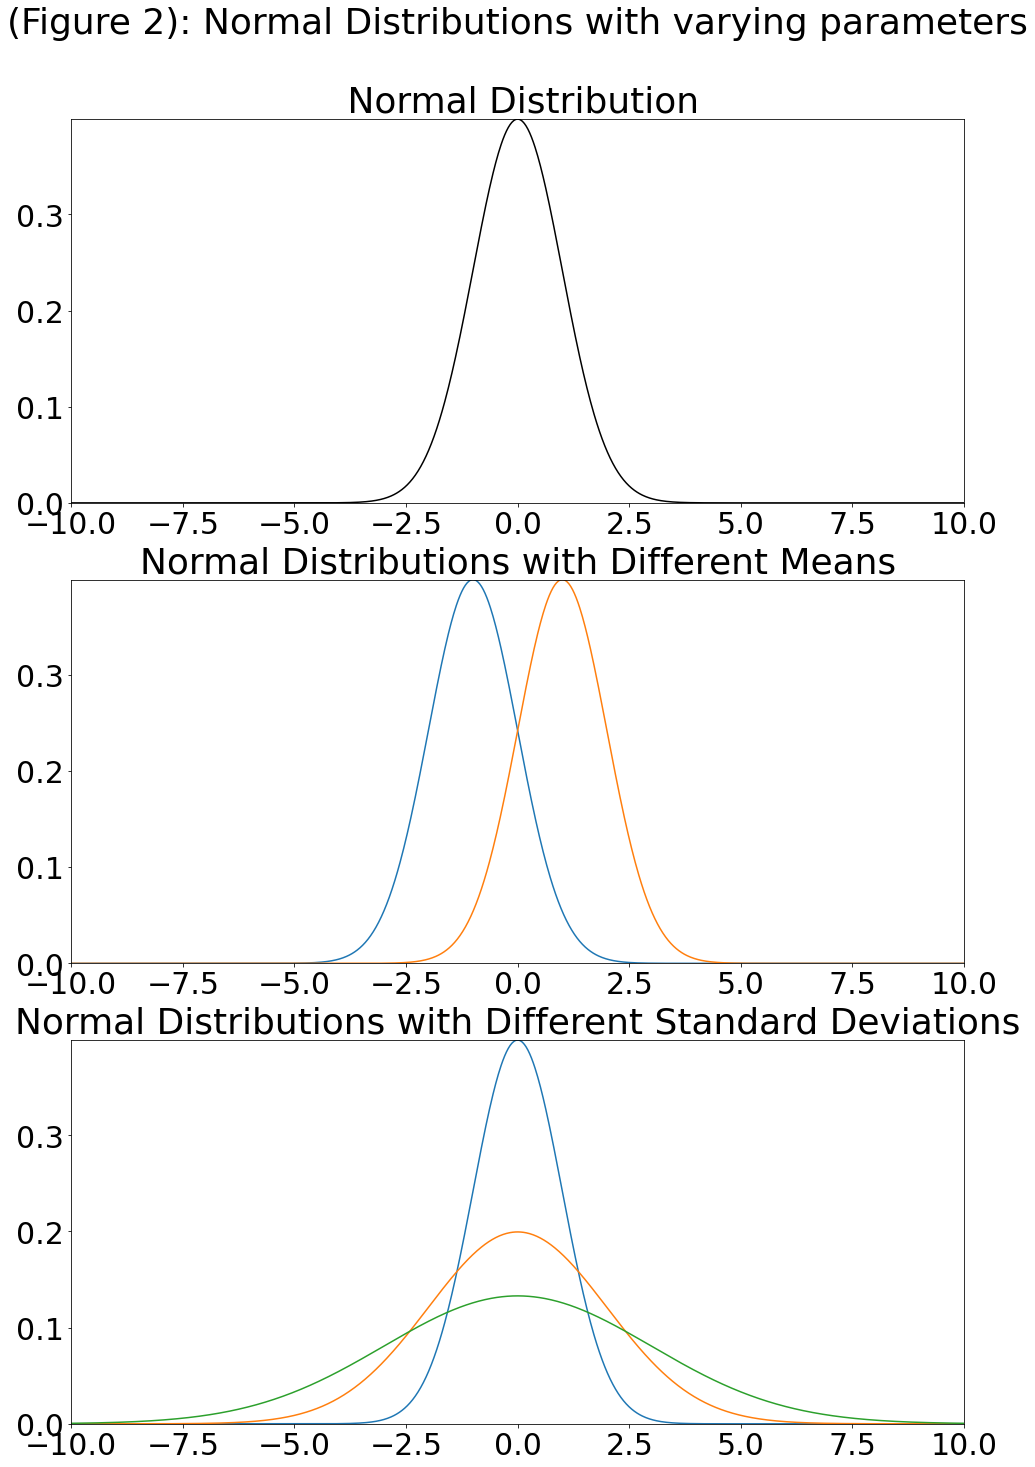

In [313]:
import math
# define normal distribution function
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000) ):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# set up plot
fig, axs = plt.subplots(3, 1, figsize=(16, 24))
x = np.linspace(-10, 10, 1000)
                
# perform transformation
normal_dist_list = normal_dist(mean=0, sd=1)
axs[0].plot(x, normal_dist_list, label= " Standard Normal Distribution", c='k')
axs[0].set_title("(Figure 2): Normal Distributions with varying parameters\n\n Normal Distribution")

# plot normal curves with varying means 
for mean in range(-1,3, 2):
    normal_dist_list = normal_dist(mean=mean, sd=1)
    axs[1].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[1].set_title("Normal Distributions with Different Means")
    
# plot normal curves with varying standard deviations 
for sd in range(1,4):
    normal_dist_list = normal_dist(mean=0, sd=sd)
    axs[2].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different Standard Deviations")

## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 



C:\Users\JLCat\AppData\Local\Temp\ipykernel_13836\672035537.py:5: RuntimeWarning: invalid value encountered in log
  density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))


Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

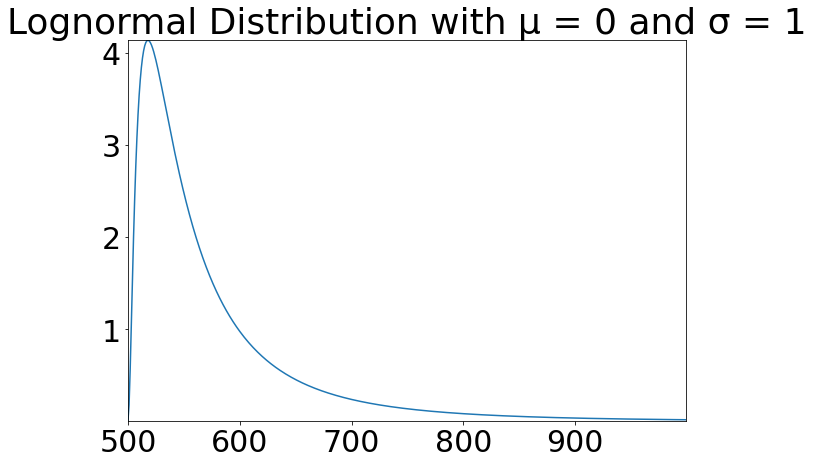

In [314]:
import math

# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def create_lognormal(mean, sd, x = np.linspace(-10, 10, 1000)):
    density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))
    return density_points

fig, ax = plt.subplots(figsize=(10, 7))
lognorm = create_lognormal(0, 1)
plt.plot(lognorm)
x = np.linspace(0, 10, 1000)
plt.title("Lognormal Distribution with μ = 0 and σ = 1")

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 


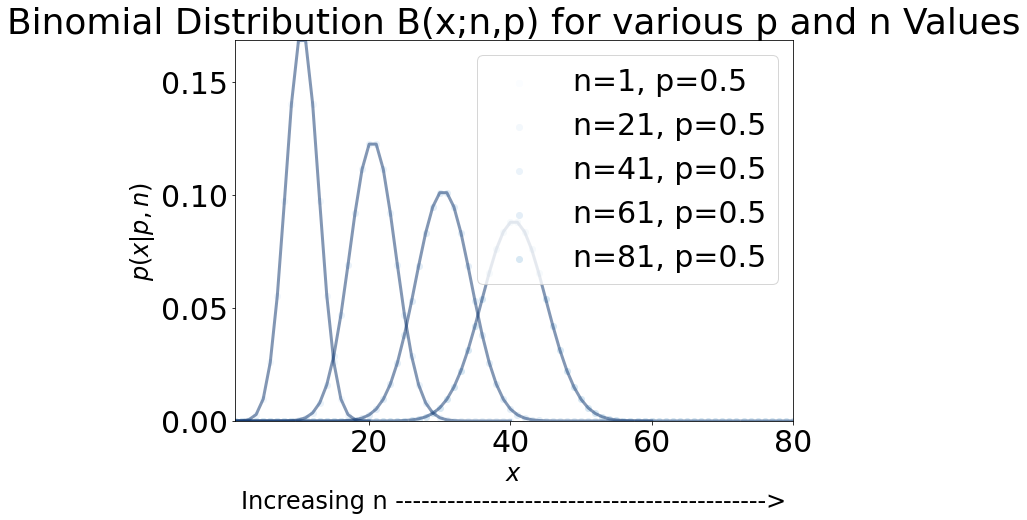

In [315]:
import math
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize


# build binomial function
def binomial(x, n, p):
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n - x)) * p**x * (1 - p)**(n - x)

fig, ax = plt.subplots(figsize=(10, 7))

cmap = cm.get_cmap('Blues')
norm = Normalize(vmin=-1, vmax=1)

p = 0.5

for n in range(1, 101, 20):
    binom_vars = [binomial(x, n, p) for x in range(1, n)]
    plt.scatter([x for x in range(1, n)],
                binom_vars,
                alpha=1,
                color=(norm(cmap(n))),
                label=f"n={n}, p={p}")
    plt.plot([x for x in range(1, n)],
             binom_vars,
             alpha=.5,
             linewidth=3,
             color=cmap(norm(n)))

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

binomial(1, 10, 0.5)

## Poisson Distribution

The Poisson probability distribution applies to many random phenomena occurring during a period of time- for example, the number of faulty products coming off an assembly line in a day or week. It also applies to spatial phenomena such as, for example, the number of typing errors on a page.

A Poisson random variable is a discrete variable that can take on any integer value from zero to infinity. The value gives the number of occurrences of the circumstance of interest during a particular period of time or within a particular spatial area. A unit probability mass is assigned to this sample space. Our concern is then with the probability that there will be, for example, zero, one, two, three, etc., calls to the police during a particular time period on a typical day, or that in typing this chapter I will make zero, one, two, etc. errors on a particular page.

**The Poisson probability function is**

<h3 align="center">
    <font size="4">
        $ P(x) = \frac{\lambda^xe^{-\lambda}}{x!}$
    </font>
    </h3> 
    
where 
- $\lambda$ = the expected mean of x over many trials

- $x$ is the number of occurences that actually happen
      
- $P(X)$ is the probability that x would equal a given x value

The poisson tells us: what is the probability of x occurences happening in a timeframe when the expected number of occurrences is $\lambda$?

For example - what is the probability of 10 people quitting from your company this year when the average has historically been 5?
-  $ P(10) = \frac{5^{10}e^{-5}}{10!} = ~0.018$

- There is a 1.8% chance that 10 or more employees quit this year. 


Text(0, 0.5, 'Probability of\noccurence of x for λ')

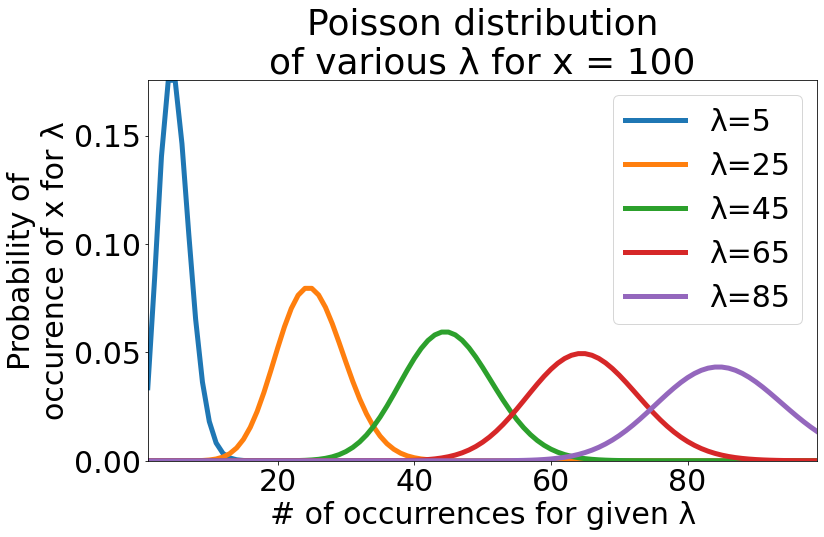

In [326]:

# substitute mean for lambda as lambda is a python keyword
def poisson(x, mean):
    p = ((mean**x) * (math.e**-mean)) / math.factorial(x)
    return p


fig, ax = plt.subplots(figsize=(12, 7))
x = 100
for mean in range(5, 100, 20):
    poisson_vars = [poisson(x, mean) for x in range(1, x)]
    xs = np.arange(1, x)
    plt.plot(xs, poisson_vars, label=f"λ={mean}", linewidth = 5)
plt.legend()
plt.title("Poisson distribution\nof various λ for x = 100")
plt.xlabel("# of occurrences for given λ")
plt.ylabel('Probability of\noccurence of x for λ')

## Sampling: T-Distribution

A __sample__ is a collection of objects or observations drawn from a larger population, usually used to make statistical inferences about that population. These statistical techniques are gone over in great detail next chapter, but for now it is important that we understand the notation of samples versus populations. The differences arise as a result of the uncertainty in measurements from samples. If, for example, we randomly selected 3 males and measured their height as 5'9, 5'7, and 5'5, the sample average would be 5'7, not the true average height for a male, which is around 5'11. We then must not assume tht samples always give us accurate pictures of the population, especially if the number in the sample is low. 

In the next chapter, we will explore statistical techniques for using samples to make inferences about populations. For now, understanding the shape of sampling distributions and the differneces in notation between sample mean, standard deviation, etc. versus those same paramters for the population is sufficient. 

#### Sampling Distribution

Let $x_1, ..., x_n$ be the numbers observed in a sample from a continuously distributed population with expected value $\mu$. The sample mean and sample variance are given by: 
<h3 align="center">
    <font size="4">
        $ \bar{x} =  \frac{x_1+...+x_n}{n}$
    </font>
    </h3> 
<h3 align="center">
    <font size="4">
        $ s^2 =  \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$
    </font>
    </h3> 
    
We can obtain a $t$-value: 
<h3 align="center">
    <font size="4">
        $ t =  \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
    
This t-value can then be entered into the t-distribution, shown below. We will create this figure in the next chapter on comparison of means through the t-test, but for now an understanding of the shape of the t-distribution is sufficient. This t-distribution models the case where the two samples _do have the same mean_. Then, as we can see, the most likely outcome is that there is no difference between the two means, hence why the distribution peaks at zero. Then, smaller diversions from the mean are more likely to occur than larger ones, giving the distribution its bell shape. 

### Cauchy Distribution

The **Cauchy Distribution** is a fat-tailed distribution, which looks normal, but has incalculable mean and variance. This appears when the possible outcomes of a random variable $X$ are extreme more often than a standard-normal distribution would predict.

For reasons beyond the scope of this book, an equation for a Cauchy distributions's mean or variance does not exist. 

As special case t-distributions, we can model both the standard normal distribution and Cauchy distributions as t-distributions with degrees of freedom of >30 and 1, respectively. Notice the large difference in tail size. More extreme events are much more likely if a random variable follows a Cauchy distribution. 

    
<img src="tdistribution.png">


    
__Distribution of Sample Means__ 

We should view the sampling distributions of $\bar{X}$ and $S^2$ as the mechanisms from which we will be able to make inferences on the parameters $\mu$ and $\sigma^2$. The sampling distribution of $\bar{X}$ with sample size $n$ is the distribution that results when an experiment is conducted over and over (always with sample size $n$) and the many values of $\bar{X}$ result. This sampling distribution, then, describes the variability of sample averages around the population mean $\mu$. Knowledge of the sampling distribution of $\bar{X}$ arms us with the knowledge of a “typical” discrepancy between an observed $\bar{x}$ value and
true $\mu$. The same principle applies in the case of the distribution of $s^2$. The sampling distribution produces information about the variability of $s^2$ values around
$\sigma^2$ in repeated experiments. 
    
#### I.I.D. Assumption

The t-distribution with $n-1$ degrees of freedom is the sampling distribution of the t-value when the samples consist of independent identically distributed observations from a normally distributed population. Thus for inference purposes t is a useful "pivotal quantity" in the case when the mean and variance $(\mu ,\sigma ^{2})$ are unknown population parameters, in the sense that the t-value has then a probability distribution that depends on neither $\mu$  nor $\sigma ^{2}$

## Distributions of stock data 
In the domain of stock returns, most stocks will fall somewhere on the continuum between standard normal and the Cauchy distribution. Plotting the returns of a stock can tell you about investor feelings toward the stock, and whether the stock has a distribution closer to that of the Cauchy, with fat tails, or the standard normal with thin tails. Stocks whose returns distribution has fat tails have had more extreme changes, more often. Stocks whose return distribution clusters around its mean have had fewer extreme changes. In fact, in finance, the relative volatility of a stock is referred to as it's _beta_($\beta$). $\beta$ is unique for each security in a portfolio. It is a weight that describes the sensetivity of that security to market changes. $\beta$ is generally found using past market data, where the "market" is the S&P500. In fact, a $\beta$ for a given security $i$ can be found by taking the ratio of the covariance between the returns from that security and the market returns, and the variance of the market returns. This will quantify relative volatility of a security: 
<h3 align="center">
    <font size="5">
        $ \beta_i = \frac{Cov(r_i,r_m)}{Var(r_m)}$
    </font>
</h3>

Without even knowing this equation, we can know whether a stocks returns have been more volatile that that of the market by looking at their return distributions:

For example, we can compare the returns of the S&P500 to the returns of Proctor & Gamble, a historically low-volatility stock, and Tesla, a relatively high-volatility stock. 


In [327]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

pg_data = web.DataReader('PG', 'yahoo', dt.datetime(2010, 1, 1),
                           dt.datetime.today())
tsla_data = web.DataReader('TSLA', 'yahoo', dt.datetime(2010, 1, 1),
                           dt.datetime.today())
pg_returns = pg_data["Adj Close"].pct_change().resample("W").first().dropna()
tsla_returns = tsla_data["Adj Close"].pct_change().resample("W").first().dropna()
market_data = web.DataReader('^GSPC', 'yahoo', dt.datetime(2010, 1, 1),
                             dt.datetime.today()).resample("W").first()
sp500 = market_data["Adj Close"].pct_change()

Calculating the beta values is simple using numpy's covariance and variance functions: 

In [328]:
pg_beta = np.cov(pg_returns, sp500) / np.var(sp500)
print(pg_beta[0,0])

tsla_beta = np.cov(tsla_returns, sp500.reindex_like(tsla_returns)) / np.var(sp500)
print(tsla_beta[0,0])

0.1833460671398013
3.017907405748019


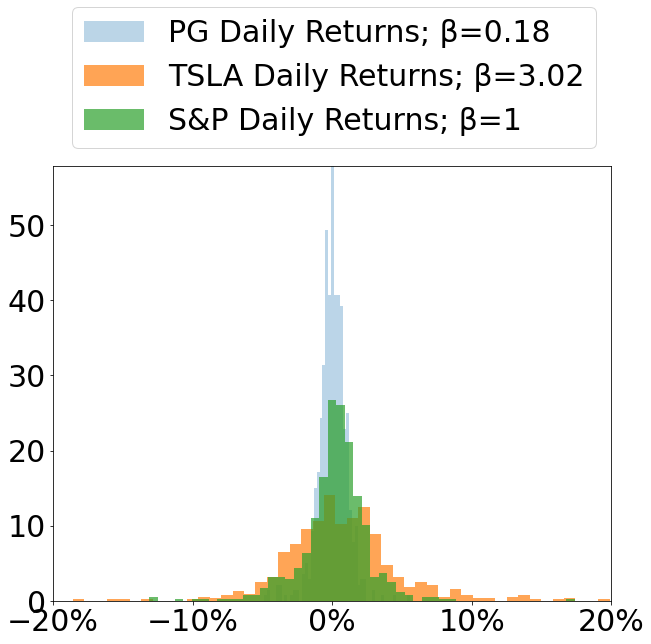

In [336]:
fig, ax = plt.subplots(figsize=(10, 8))
pg_returns.hist(bins=50,
                   label="PG Daily Returns; β="+str(pg_beta[0,0].round(2)),
                   ax=ax,
                   density=True,
                   grid=False,
                   alpha=.3)
tsla_returns.hist(bins=50,
                     label="TSLA Daily Returns; β="+str(tsla_beta[0,0].round(2)),
                     ax=ax,
                     density=True,
                     grid=False,
                     alpha=.7)
sp500.hist(bins=50,
                      label="S&P Daily Returns; β="+str(1),
                      ax=ax,
                      density=True,
                      grid=False,
                      alpha=.7)
#pg_returns_df["Adj Close"].plot.kde(ax=ax,
#                                      label="Standard Normal",
#                                     grid=False,
##                                    c='b',
#                                  linewidth = 5,
#                                 alpha=.7)
#tsla_returns_df["Adj Close"].plot.kde(ax=ax,
#                                      label="Cauchy",
#                                      grid=False,
#                                      linewidth = 5,                                      c='orange',
#                                      alpha=.7)

ax.legend(bbox_to_anchor = (1,1.4))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_xbound(lower = -.2, upper = .2)

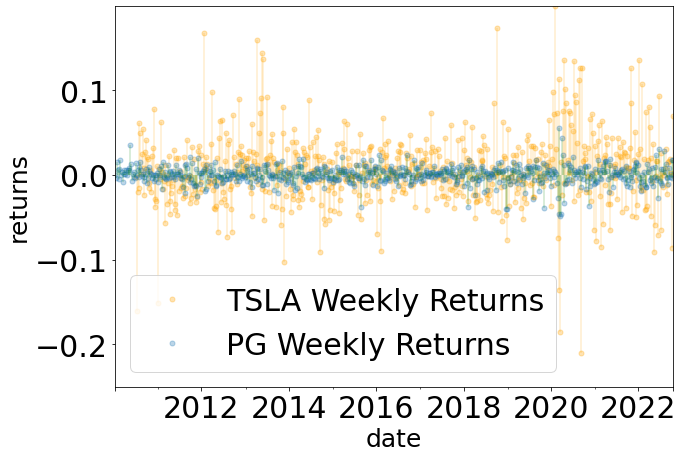

In [337]:
fig, ax = plt.subplots(figsize=(10, 7))

tsla_returns.plot(linestyle='',
                  marker='o',
                  alpha=.3,
                  ms=5,
                  label="TSLA Weekly Returns",
                  c='orange')
ax.vlines(tsla_returns.index, 0, tsla_returns.values, lw=0.3, color='orange')

pg_returns.plot(linestyle='',
                marker='o',
                alpha=0.3,
                ms=5,
                label="PG Weekly Returns",
                c='C0')
ax.vlines(pg_returns.index, 0, pg_returns.values, lw=0.3, color='green')

ax.set_ylabel('returns', fontsize=25)
ax.set_xlabel('date', fontsize=25)

ax.legend()
ax.set_ybound(lower=-.25)

plt.show()

TSLA's returns distribution more closely follows a Cauchy(fat-tailed) distribution and MSFT's returns more closely follow a standard normal distribution. 


### Central Limit Theorem:

If $\bar{X}$ is the mean of a random sample of size $n$ taken
from a population with mean $\mu$ and finite variance $\sigma^2$, then the limiting form of
the distribution of
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$
    </font>
</h3>

 as $\lim_{n \to \infty}$, is the *standard normal distribution* 
 
 The power of the CLT is that this holds no matter the type of distribution we are sampling from. So, for instance, if we took 30 random samples from a lognormal distribution, the means of the samples would be normally distributed. 
 
 The Z-value tells us: what is the probability that a given sample mean would occur given the sample size and population mean? As n gets larger, the mean is expected to get more accurate if it does follow the population mean $\mu$
 
The gotten _z-score_ tells us how many standard deviations our sample mean $\bar{X}$ is from our population mean $\mu$.
 
 The normal approximation for $\bar{X}$ will generally be good if $n ≥ 30$, provided the population distribution is not terribly skewed. If $n < 30$, the approximation is good only if the population is not too different from a normal distribution and, as stated above, if the population is known to be normal, the sampling distribution of $\bar{X}$ will follow a normal distribution exactly, no matter how small the size of the samples.

### Live Visualizations

Sometimes, it can be useful to provide a data visualization that changes. This can be a video (.mp4 file) or a GIF. The power of live visualizations is that they can show change in data in intuitive ways. For this example, we will be creating a live visualization of the Central Limit Theorem. We will show that means of samples pulled from dice rolls will approach the standard normal distribution as the number of samples increases. The live visualization enforces the idea that no matter which distribution the samples are drawn from, the set of their means will approach a standard normal distribution. 

First, the neccessary imports. We will need matplotlib as usual to create the plots, but also the matplotlib.animation library to provide live visualization functionality, and the Ipython display library to allow us to display the visualization as a GIF. 

We also choose how many samples, n, we want to take from the distributions. 30 would be sufficient but we will go up to 200 to thoroughly show the CLT.  

In [338]:
from matplotlib.animation import FuncAnimation as animation
from IPython import display
# number of simulations
n = 200

we create a dictionary with the type of distribution we are drawing from and the averages of the random samples we take from the distributions. 

In [339]:
# In each simulation, there is one trial more than the previous simulation
dist_avgs = {"Die Rolls":[],
            "Poisson":[], 
            "Lognormal": []}

for i in range(n):
    dist_avgs["Die Rolls"].append(np.average(np.random.randint(1,7,n))) 
    dist_avgs["Poisson"].append(np.average(np.random.poisson(1, n)))
    dist_avgs["Lognormal"].append(np.average(np.random.lognormal(0, 1, n)))
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0        3.530    1.000   1.816879
1        3.635    0.990   1.735155
2        3.420    1.085   1.559243
3        3.490    0.985   1.461000
4        3.755    0.890   1.885037
..         ...      ...        ...
195      3.425    1.100   1.612148
196      3.690    0.910   1.460120
197      3.570    0.930   1.634625
198      3.240    1.065   1.618326
199      3.475    0.940   1.764638

[200 rows x 3 columns]

We now have a set of sample means of size 200 from three different distributions. We can plot the final product of these to show that each of these sets follow a normal distribution, even though the distributions from which the means were drawn are not themselves normal. 

The data we will be plotting will be the random sample's mean's deviations from their own mean. So, If the average of the means was 3.5 for the die rolls, and one sample of 200 rolls had a mean of 3.7, we would plot 0.2, so that each distribution is centered on zero. 

In [340]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
# make it so that the means_df dictionary holds each distributions deviations from its own mean,
# this will center each distribution at zero. 
for key in dist_avgs:
    means_df[key] = dist_avgs[key] - dist_avgs.mean()[key]
    # means_df is centered, but the distributions have not been regularized by standard deviation, which is 
    # what the t-test does. So, we must divide the centered means by their standard deviations
    sd_df[key] = means_df[key] / means_df.std()[key] 

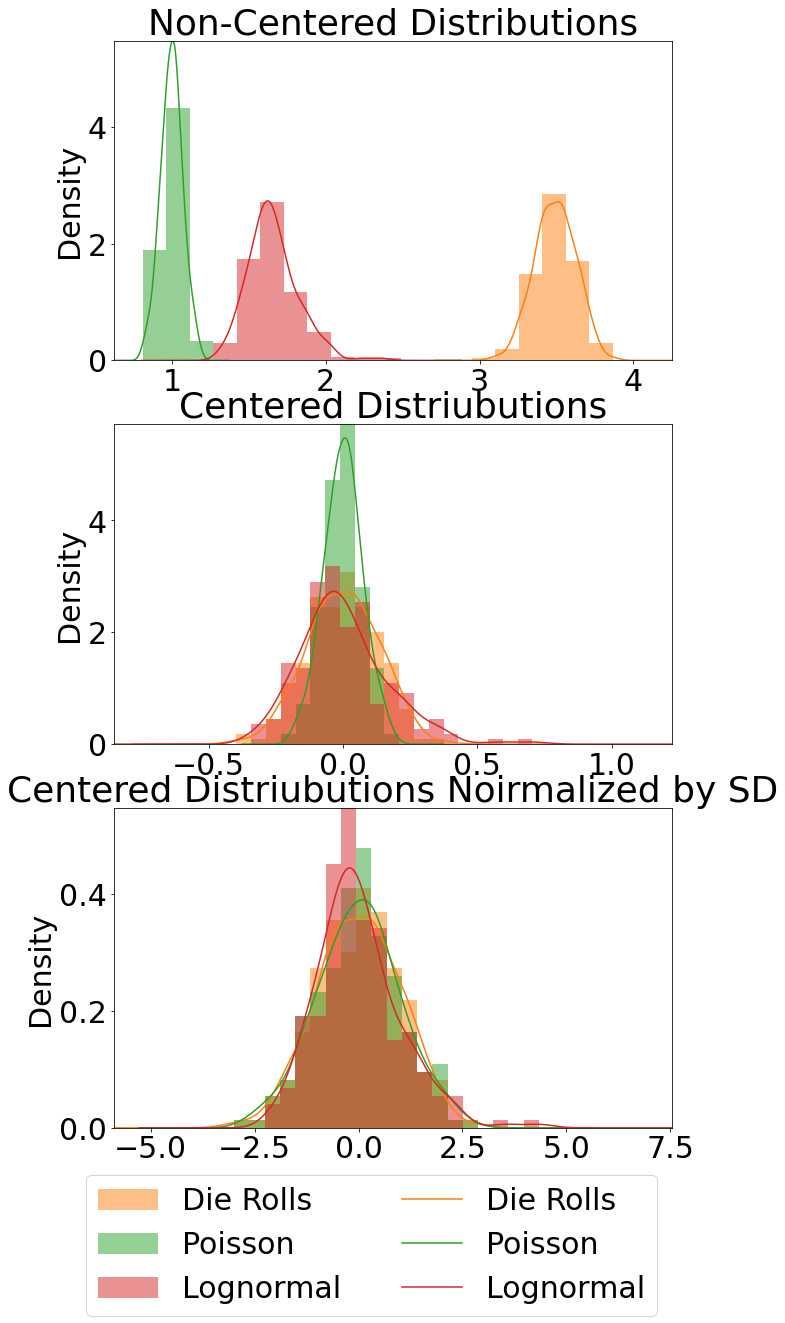

In [381]:
fig, axs = plt.subplots(3, figsize=(10, 20))

# first, plot the dataframe containing the distributions of the random sample means 
dist_avgs.plot.hist(density=True,
                    ax=axs[0],
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=axs[0], color=["C1", "C2", "C3"], legend=False)
axs[0].set_title("Non-Centered Distributions")



# next, plot the distributions which have been centered at zero
means_df.plot.hist(density=True,
                ax=axs[1],
                bins=20,
                color=["C1", "C2", "C3"],
                alpha=.5,
                  legend = False)
means_df.plot.kde(ax=axs[1], color=["C1", "C2", "C3"], legend=False)
axs[1].set_title("Centered Distriubutions")

# finally, plot the distributions centered at zero and normalized for standard deviation
sd_df.plot.hist(density=True,
                ax=axs[2],
                bins=20,
                color=["C1", "C2", "C3"],
                alpha=.5,
               legend = False)
sd_df.plot.kde(ax=axs[2], color=["C1", "C2", "C3"], legend=False)
axs[2].set_title("Centered Distributions Normalized by SD")
axs[2].legend(bbox_to_anchor = (1,-.1), ncol = 2)

plt.show()


Now, for the live visualization. We create a funtion that, for each index in our dataframe holding the means of our samples, plots each of the means that have come up to that index. So it will only be one single bin right away, and then two, and so on. Eventually, we will see that a collection of means drawn from any distribution eventually takes the shape of a normal distribution, if n is high enough. 

The FuncAnimation class from matplotlib essentially takes a function that you create(producing a plot in our case) and runs it many times, displaying the results in quick succession, to give the appearance of a live visualization. 

We will create a function, clt(), which plots the distribution only up to the current index in our sample means dictionary. It does 200 times, so the first time it iterates there will be a single data point plotted, and the final time it iterates there will be 200 data points plotted. 

<IPython.core.display.Javascript object>


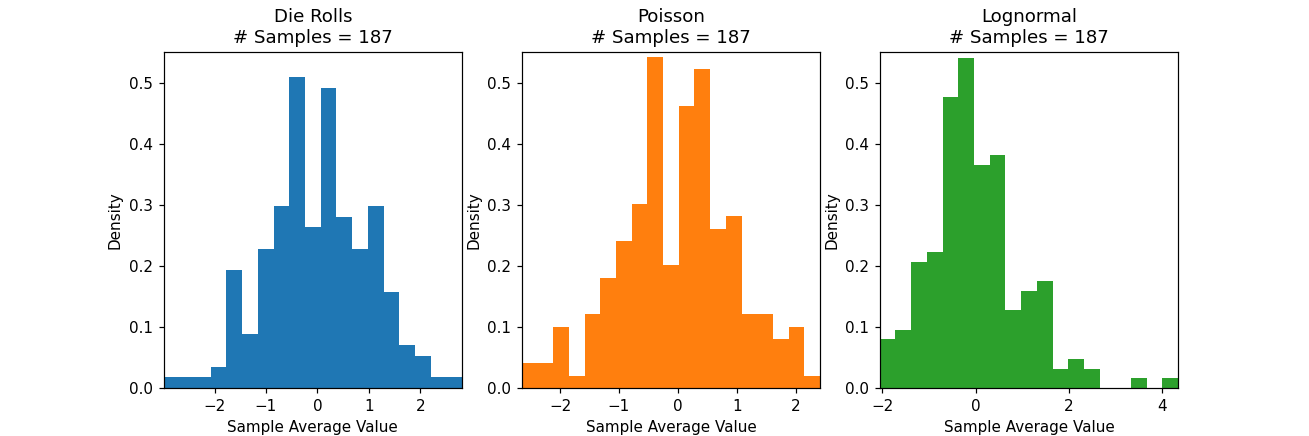

In [382]:
%matplotlib notebook
# Function that will plot the histogram, where current is the latest figure
def clt(current, *kwargs):
    # if animation is at the last frame, stop it
    if current == n:
        a.event_source.stop()

    for i in range(len(dist_avgs.keys())):
        ax[i].clear()
        dist = list(dist_avgs.keys())[i]
        sd_df[dist].iloc[:current].plot.hist(density = True,
                                                 color = "C" + str(i),
                                             bins= int(current/10 + 1),
                                             ax = ax[i])
#         ax[i].hist(dist_avgs[dist][0:current], bins= int(current/10 + 1))
        title = dist+'\n# Samples = {}'
        ax[i].set_title(title.format(current))
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)
        ax[i].set_ylim(bottom = 0, top = .55)

#     plt.annotate('Die roll = {}'.format(current), [3,27])
fig, ax = plt.subplots(1,3, figsize = (12,4))
xlabel, ylabel = 'Sample Average Value', 'Density'
kwargs = (ax, xlabel, ylabel, n, sd_df)
a = animation(fig, clt, interval=100, frames=n, fargs = kwargs)
# video = a.to_html5_video()
# html = display.HTML(video)
# display.display(html)
#plt.show()

In [383]:
a.save("clt_final.gif")

# add this code to a markdown cell to embed the GIF we just saved: 
# <img src="clt.gif">

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [ ]:
This is the gif we just produced, embedded: 

<img src="clt_final.gif">

### Generating Random Points about a Line

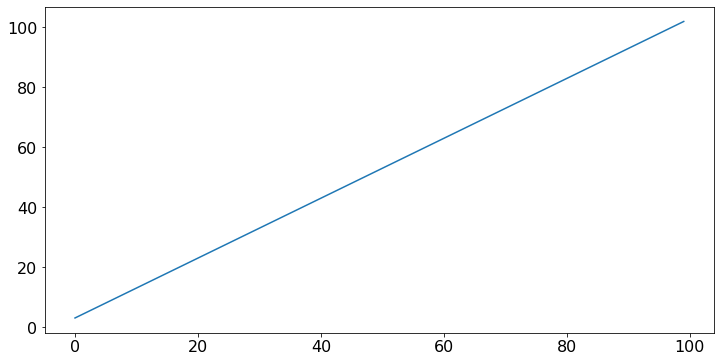

In [306]:
#lineAndRandomPoints.py
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12, 6))
plt.plot(line)
plt.show()

The line created is the true line. We will generate points from normal distributions whose median values are indicated by the line using _normalvariate()_:

In [ ]:
points.append(random.normalvariate(mu, sigma))  

Here, mu defines the expectation – the mean and, by implication, the median –  of the distribution and _sigma_ indicates the standard deviation. We will pass values from the line to both, thus increasing the mean and variance of the distribution.

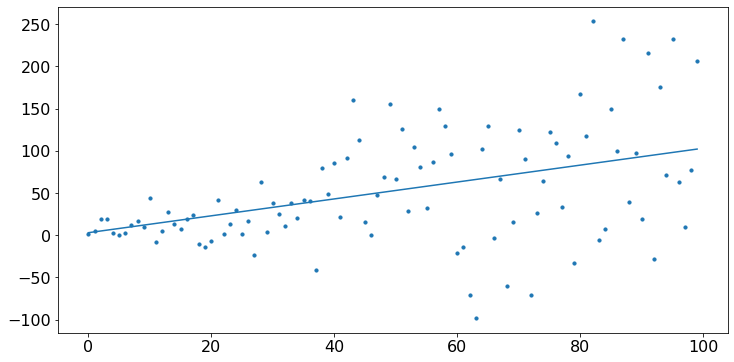

In [307]:
#lineAndRandomPoints.py
# . . .
import random
# . . .
points = []
for point in line:
    points.append(random.normalvariate(point, point))

figure = plt.figure(figsize = (12, 6))
plt.plot(line)
plt.scatter(np.arange(len(points)), points, s = 10)

plt.show()

Matplotlib automatically leaves a margin behind. Reduce the margins using plt.rcParams. This allows access to variables that define this margin. Reduce the margin to 0.

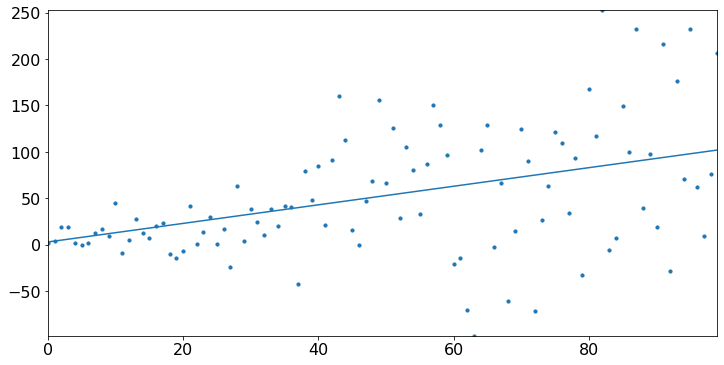

In [308]:
#lineAndRandomPoints.py  
# . . .
figure = plt.figure(figsize = (12,6))  
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.plot(line)  
plt.scatter(np.arange(len(points)), points, s = 10)  
plt.show()

A graph should have a title, labels, or both. Add a title using plt.title(). The size of this text is defined by fontsize.

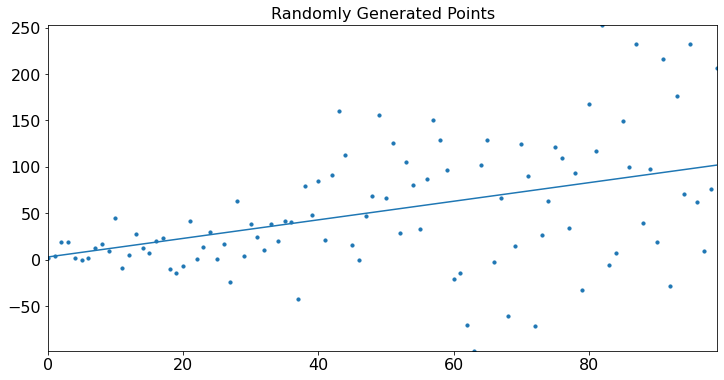

In [309]:
#lineAndRandomPoints.py  
# . . .
figure = plt.figure(figsize = (12,6))  
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.plot(line, label = "Truth")  
plt.scatter(np.arange(len(points)), points, s = 10,   
            label = "Points from\nNormal Distribution")  
plt.title("Randomly Generated Points", fontsize = 16)  

plt.show()

Finally, we add labels to each of the types of objects in the graph. This is accomplished by adding *label = label_name* to _plt.plot()_ and _plt.scatter()_.

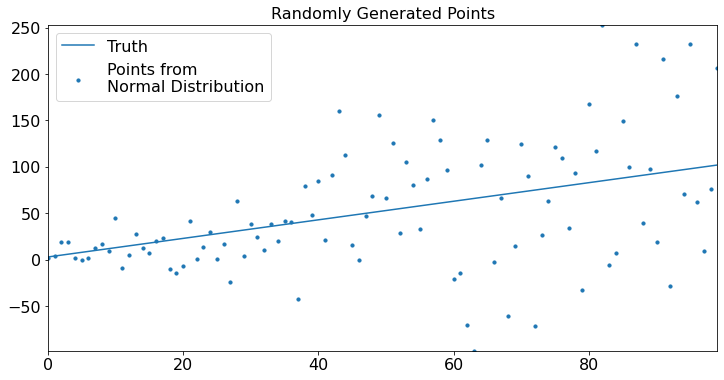

In [310]:
#lineAndRandomPoints.py
# . . . 
figure = plt.figure(figsize = (12,6))  
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.plot(line, label = "Truth")  
plt.scatter(np.arange(len(points)), points, s = 10,   
            label = "Points from\nNormal Distribution")  
plt.title("Randomly Generated Points", fontsize = 16)  
plt.legend(loc="best")  
plt.show()  

It may be convenient to create a functions that allow for control of a few features of the line, points, and visualizations. For simplicity, the standard deviation governing the creation of the scatter plot will now be a constant. Included is the final version of the script:

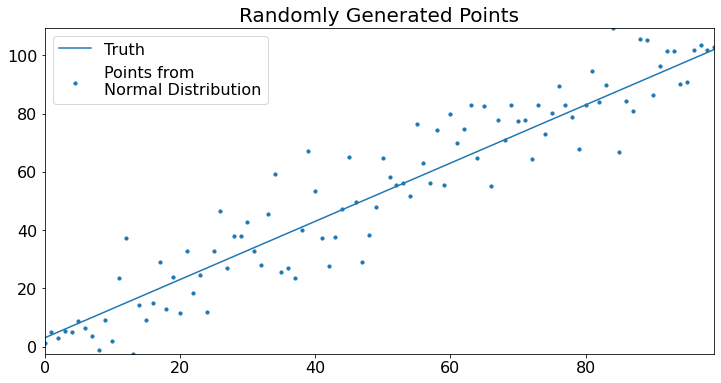

In [311]:
#lineAndRandomPointsFunction.py  
import numpy as np  
import matplotlib.pyplot as plt  
import random  
  
def build_random_data_with_line(y_int, slope, SD = 1):  
  
    # line is defined by the y_intercept and slope  
    line = np.array([slope * (i + y_int) for i in range(100)])  
    points = []  
    for point in line:  
        points.append(random.normalvariate(point, SD))  
          
    return line, points  
  
def plot_line(line, points, line_name = "Truth",   
              title = "Randomly Generated Points"):  
      
    figure = plt.figure(figsize = (12,6))  
    plt.rcParams['axes.ymargin'] = 0  
    plt.rcParams['axes.xmargin'] = 0  
    plt.plot(line, label = line_name)  
    plt.scatter(np.arange(len(points)),points, s = 10,   
                label = "Points from\nNormal Distribution")   
    plt.title(title, fontsize = 20)  
    plt.legend(loc="best")  
    plt.show()  
      
line, points = build_random_data_with_line(y_int = 3, slope = 1, SD = 10)  
plot_line(line, points)  

## Monte Carlo Simulation

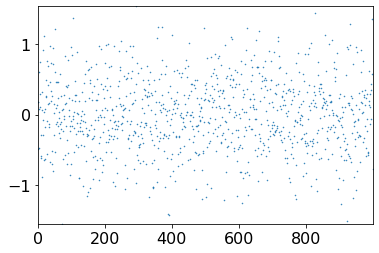

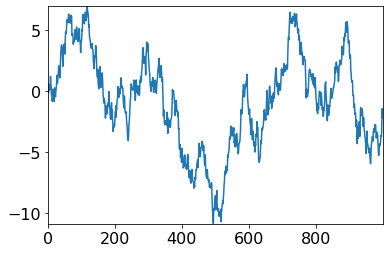

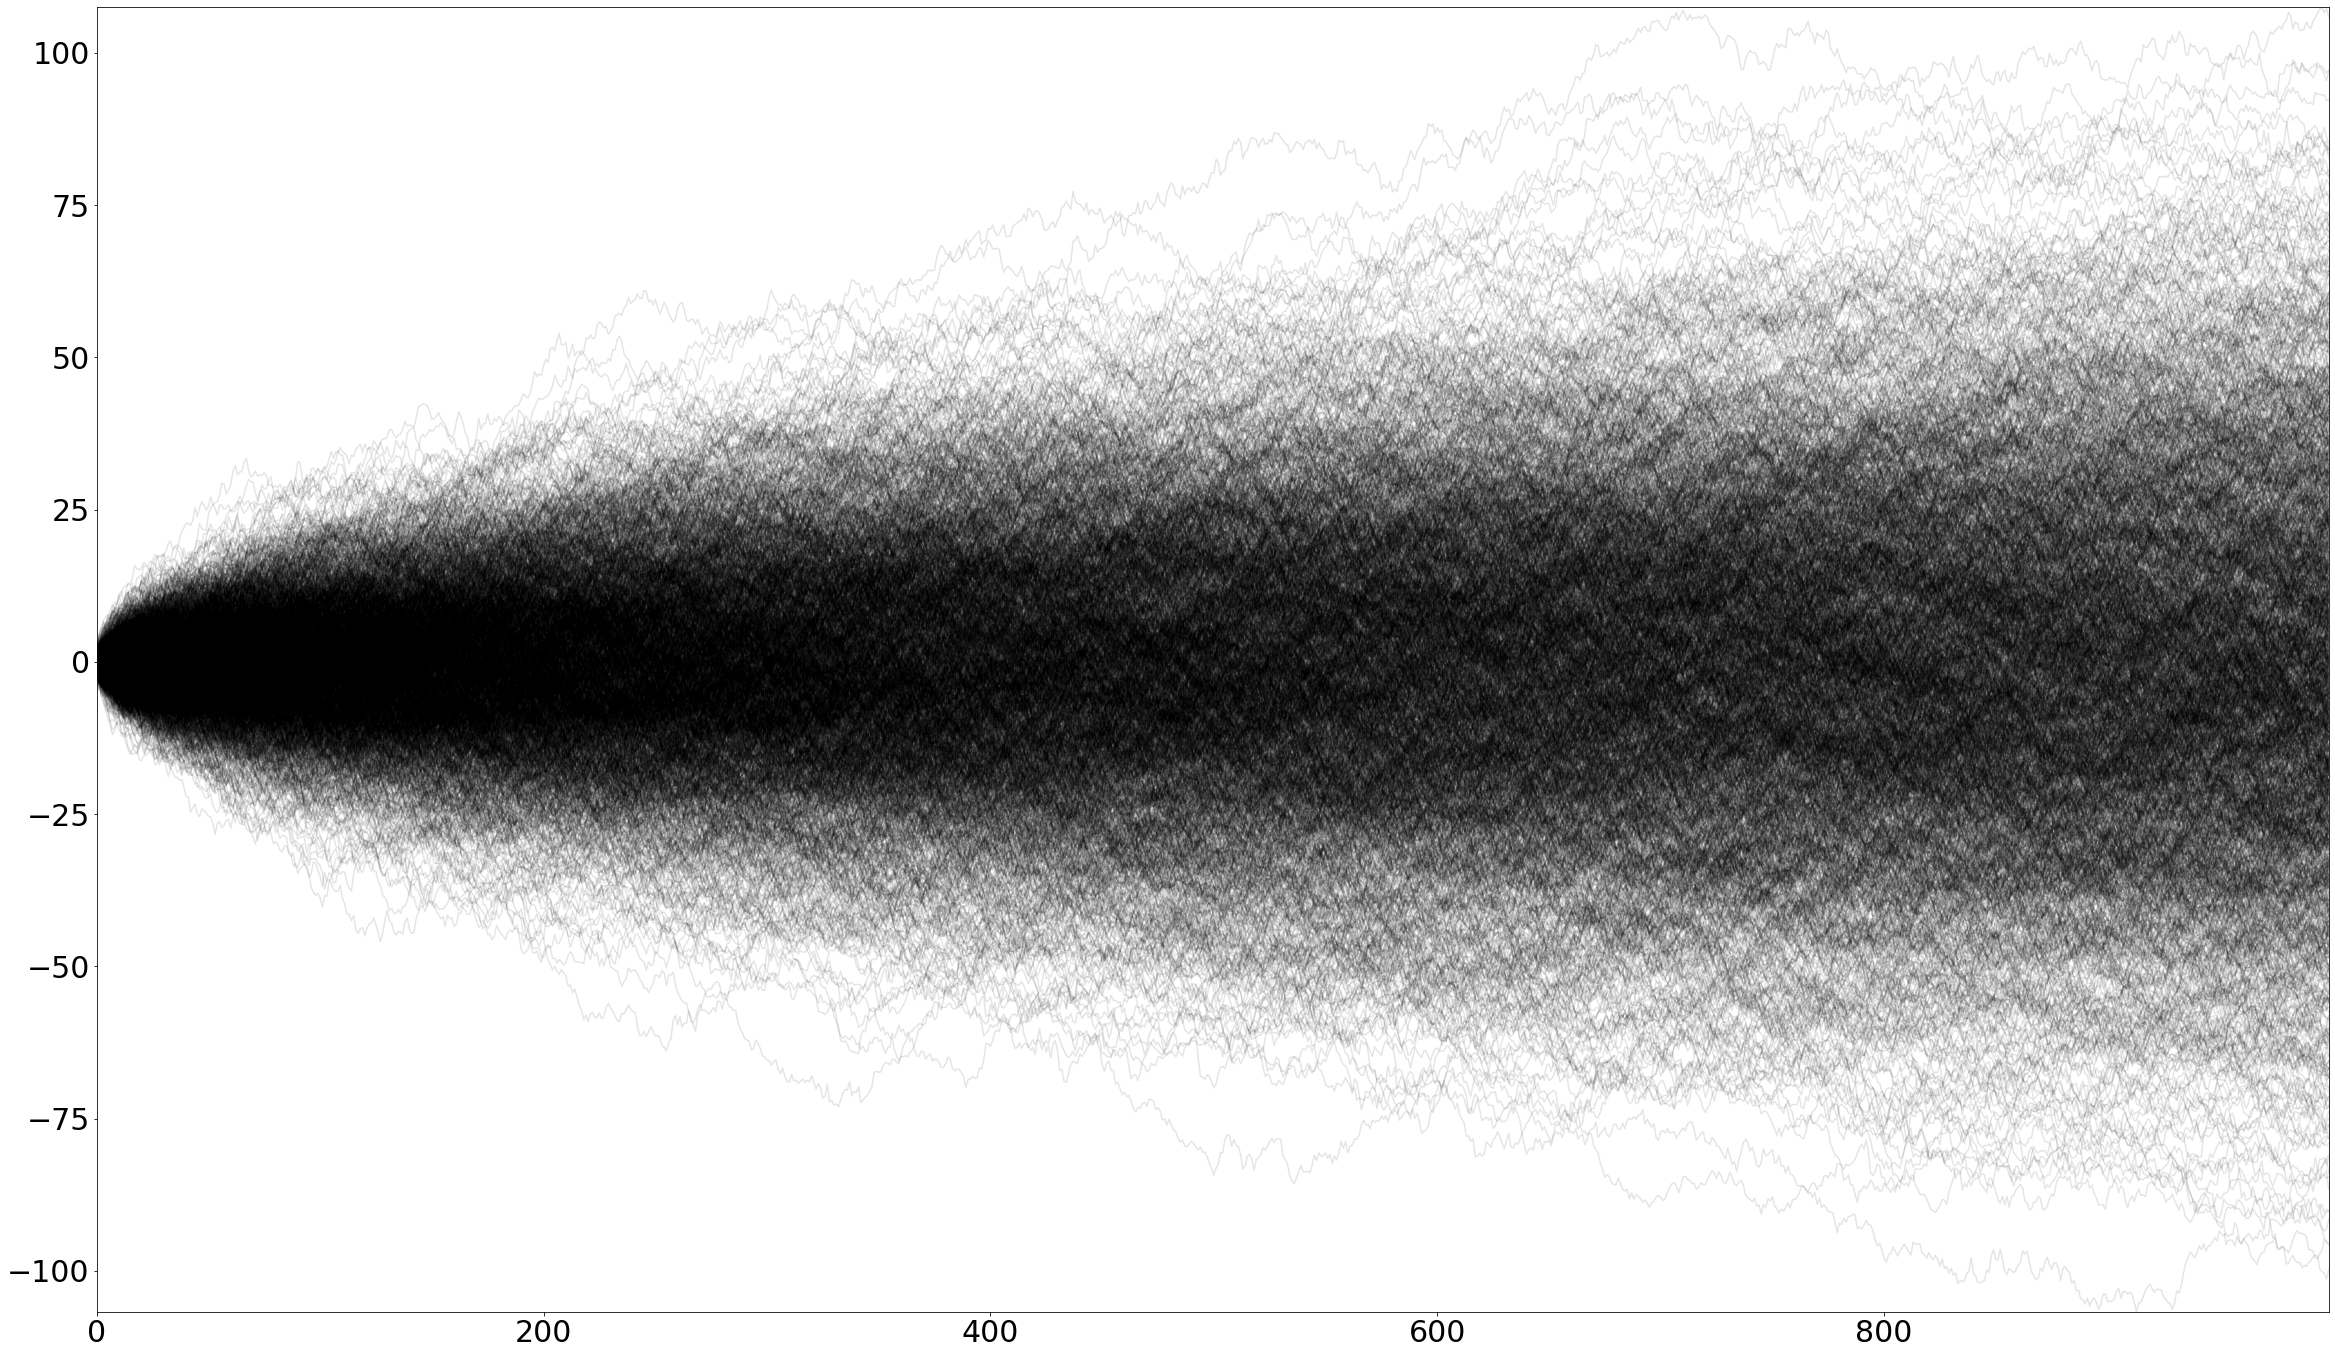

C:\Users\JLCat\AppData\Local\Temp\ipykernel_13836\3719922294.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


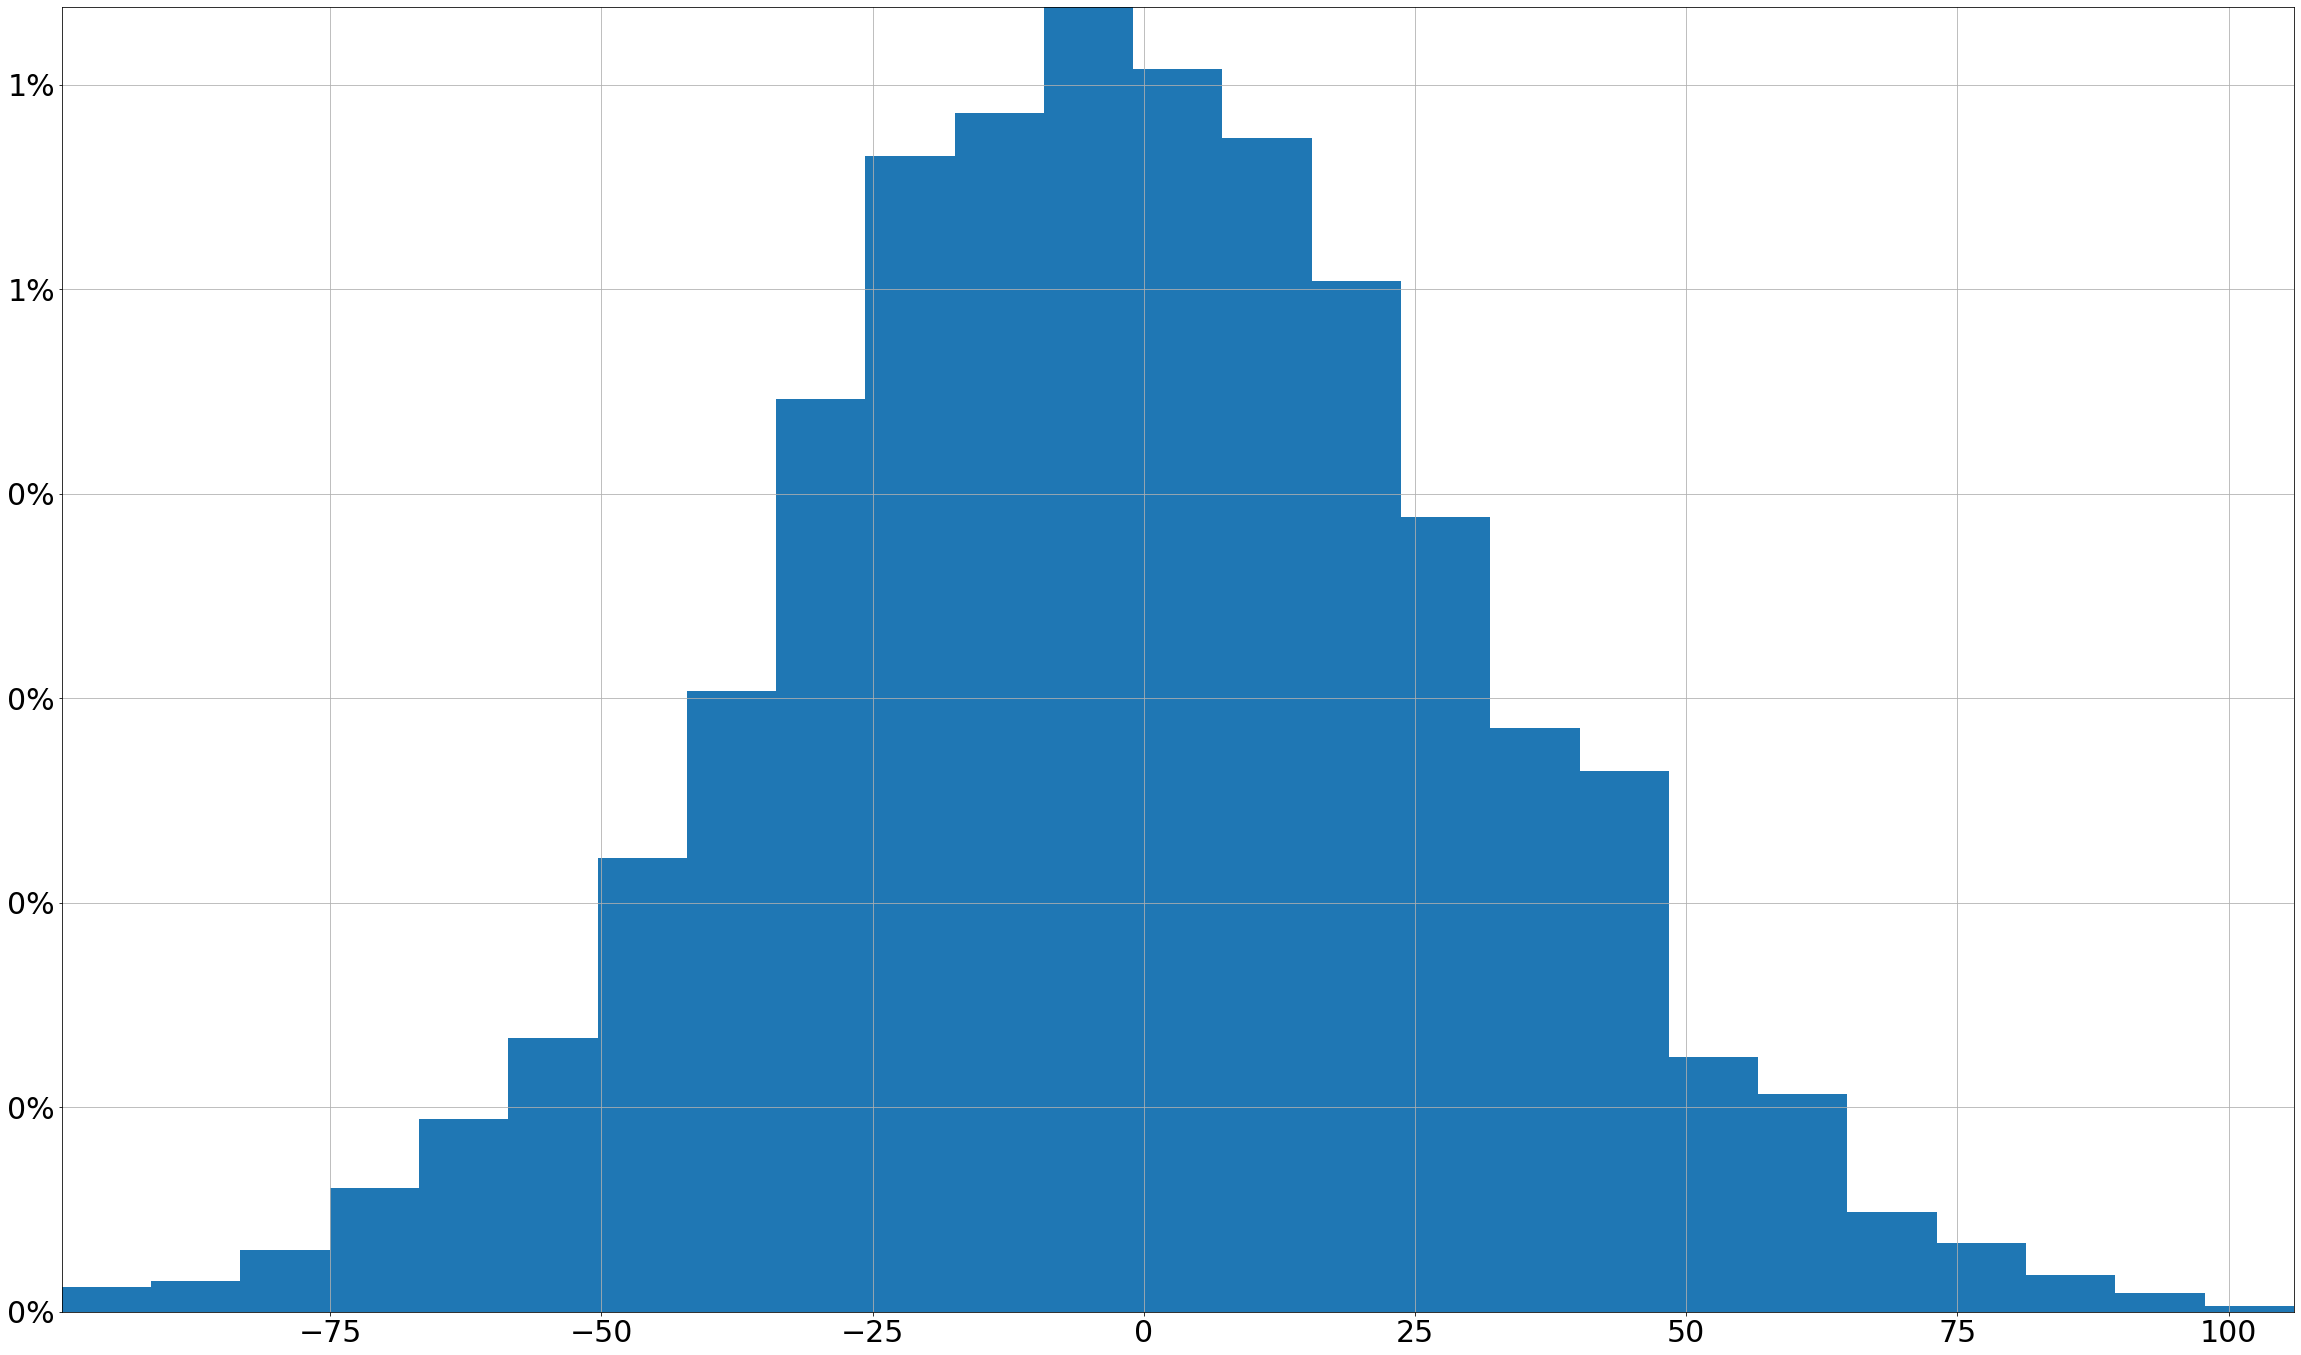

In [312]:
# montecarlo simulation
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import random  

random_list = []
for i in range (1000):
    random_list.append(random.normalvariate(0, .5))
    
plt.plot(random_list, ls = "", marker = ".", markersize = 1)
plt.show()
plt.close()

simulation = []

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i - 1] + val)
    
plt.plot(simulation)
plt.show()
plt.close()


mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 1000
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    for period in range(periods):
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)

plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0 
plt.rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, marker = ".", markersize = .1, 
                             color = "k", alpha = .1, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, density = True,
                               ax = ax)
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.show()
plt.close()

### Exercises
1. Create a list of random numbers between 0 and 100 whose length is 1000. (Hint: import random; search "python random" to learn more about the library.)

2. Use the variance function from the textbook to find the variance of this list. Assume that the list represent a population in whole. 

3. Create a 9 more lists of the same length whose elements are random numbers between 0 and 100. Use a nested dictionary to house and identify these lists. Keys for the first layer should be the numbers 1 through 10. Lists should be stored using a second key as follows: dict_name[index]["list"]. Index represents the particular integer key between 1 and 10 as noted above.

4. Find the variance of each list and store it as follows: dict_name[index]["variance"].

5. At the end of chapter 2, we used for loops to find min and max values. Create a min() function and max() function and pass the values from the list in question 1 to each of these to determine the min and max values in that list.

6. Explain why it might be advantageous to create a function instead of building all commands from scratch as you create a script.

### Exploration:
1. Visit the Python Essentials lesson from Sargent and Stachurski. Complete exercise 3. Pass 3 other sentences to the function that you create. Include a paragraph that explains in detail how the function operates

2. Visit the Python Essentials lesson from Sargent and Stachurski. Complete exercise 4. Pass 3 pairs of unique lists to the function. Include a paragraph explaining in detail how the function operates, including explanation for a solution that uses set().

